In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic_data=pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.shape

(891, 12)

In [4]:
titanic_data.shape

(891, 12)

### analyzing data

<Axes: xlabel='Survived', ylabel='count'>

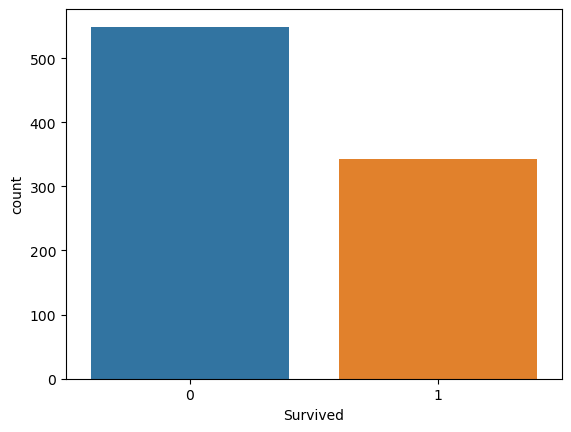

In [5]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

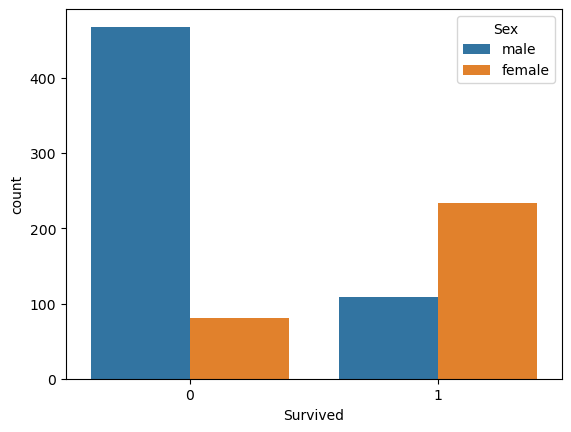

In [6]:
sns.countplot(x='Survived',data=titanic_data,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

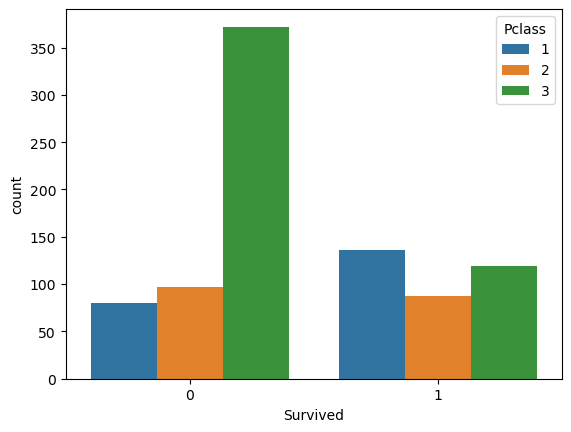

In [7]:
sns.countplot(x='Survived',data=titanic_data,hue='Pclass')

<Axes: ylabel='Frequency'>

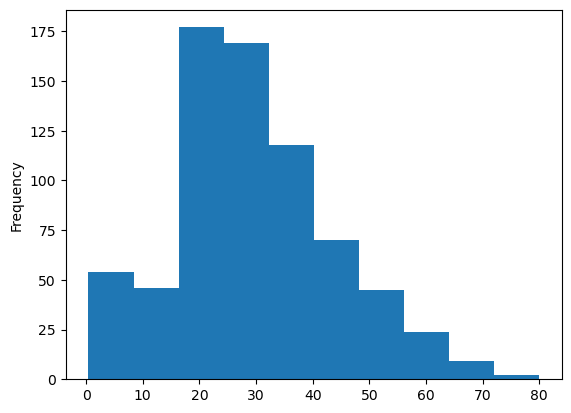

In [8]:
titanic_data['Age'].plot.hist()

<Axes: ylabel='Frequency'>

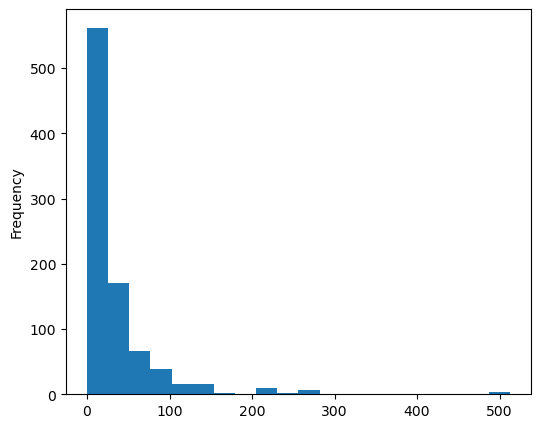

In [9]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(6,5))

<Axes: xlabel='SibSp', ylabel='count'>

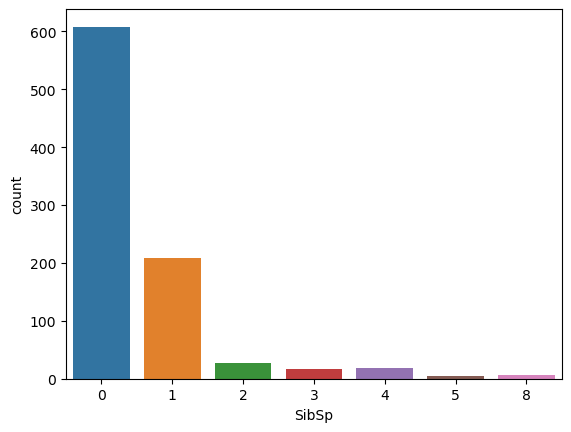

In [10]:
sns.countplot(data=titanic_data,x="SibSp")

<Axes: xlabel='Pclass', ylabel='Age'>

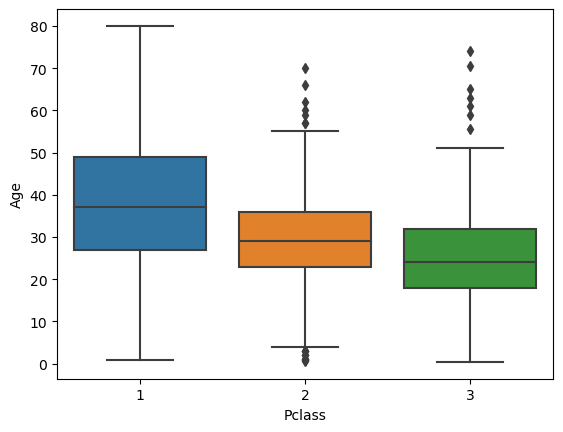

In [11]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

### data cleanung and wrangling

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

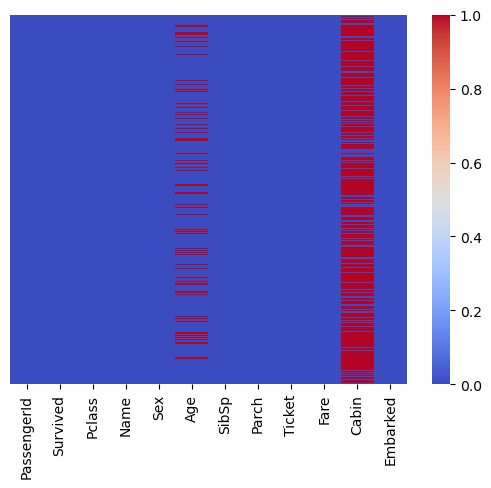

In [13]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='coolwarm')

In [14]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [15]:
titanic_data.dropna(inplace=True)

<Axes: >

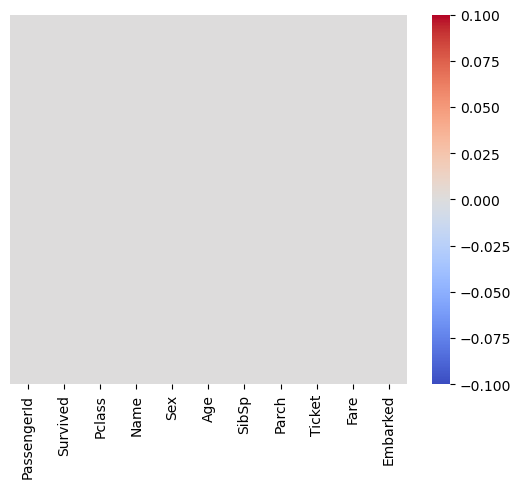

In [16]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='coolwarm')

In [17]:
titanic_data.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.5+ KB


In [19]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [20]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

In [21]:
titanic_data.drop('Sex',axis=1,inplace=True)

In [22]:
titanic_data=pd.concat([titanic_data,sex],axis=1)

In [23]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### traning and testing data

In [24]:
x=titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

### model evaluation

In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy=accuracy_score(y_test,y_predicted)
print("Accuracy: ",accuracy)

confusion_mat=confusion_matrix(y_test,y_predicted)
print("Confusion Matrix: ")
print(confusion_mat)

classification_rep=classification_report(y_test,y_predicted)
print('Classification Report: ')
print(classification_rep)

Accuracy:  0.7552447552447552
Confusion Matrix: 
[[66 19]
 [16 42]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        85
           1       0.69      0.72      0.71        58

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



### ROC (Receiver Operating Characterstic curve)

#### It is the plot of the true positive rate against the false positive rate.

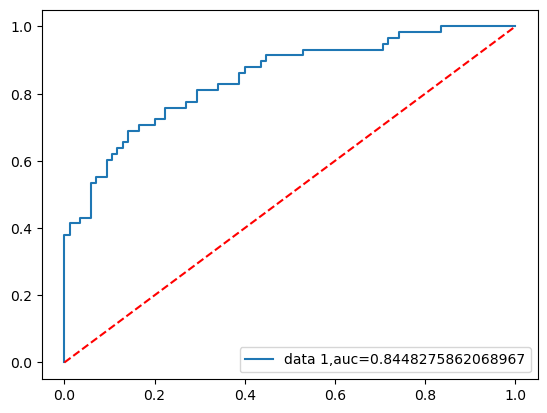

In [28]:
from sklearn import metrics
y_pred_proba=model.predict_proba(x_test)[::,1]
fpr,tpr, _ =metrics.roc_curve(y_test,y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)  #area under the curve(auc)
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.plot([0,1],[0,1],'r--')

plt.legend(loc=4)
plt.show()

### Log loss

In [29]:
from sklearn.metrics import log_loss

y_p=model.predict_proba(x_test)
logloss=log_loss(y_test,y_p)
print('Logloss: %.2f'%(logloss))

Logloss: 0.48


In [30]:
import joblib
joblib.dump(model,'logistic_titanic.joblib')

['logistic_titanic.joblib']

In [31]:
loaded_model=joblib.load('logistic_titanic.joblib')

Survived=1
Pclass=0
Age=0
SibSp=1
Parch=1
Fare=1


input_data=[Survived,Pclass,Age,SibSp,Parch,Fare]
output_data=loaded_model.predict([input_data])     #2D
print(f'The predicted price is Rs.{round(output_data[0])}/-')

The predicted price is Rs.1/-


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
